In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
import pandas as pd

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/AICUP_2023_CreditCard/

/content/drive/MyDrive/AICUP_2023_CreditCard


In [3]:
!ls

 08.金融信用卡組1204.pdf		      submission_1024_3.csv   信用卡營運智慧分析系統.pdf
 31_dataset_1st_training_public_testing.zip   submission_1024.csv     初探資料.ipynb
 31_範例繳交檔案.csv			      submission_1030_1.csv   建模.ipynb
 31_資料欄位說明.xlsx			      submission.csv	      建模_精簡模型.ipynb
 dataset_1st				      testing_data.csv	     '建模預測.ipynb 的副本'
 EDA.ipynb				      training_data.csv       處理遺失值和切割資料.ipynb
 submission_1021.csv			      Untitled0.ipynb
 submission_1024_2.csv			      Untitled1.ipynb


In [4]:
file_path = 'training_data.csv'
data = pd.read_csv(file_path)

In [5]:
print(data.shape)

(893606, 26)


In [6]:
data.head()

,txkey,locdt,loctm,chid,cano,contp,etymd,mchno,acqic,mcc,...,stocn,scity,stscd,ovrlt,flbmk,hcefg,csmcu,csmam,flg_3dsmk,label
0,1c09727c939eb69ead2a4ce4072b8aa18992a64f01fcb4...,46,101812,84d2dc85d4da6a7fa284a11a4290d7e9a969163dcb4d82...,3dd5bf1e29e5e0baa789ce692fe5dbd34ff05173acf351...,5,1.0,cad752c5d05d2bdcc30d64fa4e68404c2d1f7be5d14d52...,8f6b3ff512a001e0d1988c6cd888ef8c74112fb71117e5...,375.0,...,0.0,15759.0,-1.0,0,0,6.0,70.0,1529,0,0
1,2043f245a93bc6328dac964d6dbc89f13a0346062c194d...,17,85509,9a8cf5d0afd729cb7876f6b3172152c7c9c6fabd40515c...,8cb13f9b38c7bbc02d210e580dcbbcbb6c95bf18bc3320...,5,8.0,4356c6642ef6e837543b577c7ee3ffa92b4b8fcfb57254...,379166ff4a62dac343b4b734188aa618716cc496e48b65...,282.0,...,0.0,15759.0,-1.0,0,0,8.0,70.0,101,0,0
2,e4853710290a8409279f3279f8032ae670824bd19aa173...,44,212641,dcc1389a5765d6f53152cf85970fbe78a83fd3d1c299b0...,1ec32868e5e1d5ff8df56737c2a91326cbfe3364382de6...,5,4.0,5b7eff061f8896aac4339ea35c25f8bb956a43bc486460...,8f6b3ff512a001e0d1988c6cd888ef8c74112fb71117e5...,288.0,...,0.0,15759.0,-1.0,0,0,6.0,70.0,116,0,0
3,74d811b1dbc28b22b73ba2c79bb6033791d913b6d27a25...,42,102702,577f2329d1eccd59ba0abaf6113bb78dcd575badcbc57f...,4359dca1ac6a835eceb2bc0dd6b0b710f030c3499126e9...,5,1.0,cad752c5d05d2bdcc30d64fa4e68404c2d1f7be5d14d52...,36684976be1f529e6e2a32c9edab4cf8e364b2b916ae2c...,375.0,...,0.0,15759.0,-1.0,0,0,6.0,70.0,1683,0,0
4,68ca182343969d429d79a34e532bc1ca7a3cc032c2ad81...,31,185737,fff6b4126c40620b1fbb11d4de02cd67b9e95071caa40b...,a3837f2905383f235a72679482c5f02e40f2a8ca29750d...,5,5.0,50d5b02ce3fc88723438c2a29cfdb04be4a1a11280ddb6...,379166ff4a62dac343b4b734188aa618716cc496e48b65...,406.0,...,0.0,15759.0,-1.0,0,0,6.0,70.0,14,0,0


In [8]:
data.columns

Index(['txkey', 'locdt', 'loctm', 'chid', 'cano', 'contp', 'etymd', 'mchno',
       'acqic', 'mcc', 'conam', 'ecfg', 'insfg', 'iterm', 'bnsfg', 'flam1',
       'stocn', 'scity', 'stscd', 'ovrlt', 'flbmk', 'hcefg', 'csmcu', 'csmam',
       'flg_3dsmk', 'label'],
      dtype='object')

In [9]:
categorical_dict = {'txkey':'交易序號', 'chid':'顧客id', 'cano':'交易卡號', 'contp':'交易類別', 'etymd':'交易型態', 'mchno':'特店代號',
                    'acqic':'收單行代碼', 'mcc':'mcc_code', 'ecfg':'網路交易註記', 'insfg':'是否分期交易', 'bnsfg':'是否紅利交易',
                    'stocn':'消費地國別', 'scity':'消費城市', 'stscd':'狀態碼', 'ovrlt':'超額註記碼', 'flbmk':'Fallback註記', 'hcefg':'支付型態',
                    'csmcu':'消費地幣別', 'flg_3dsmk':'3D交易註記', 'label':'盜刷與否'}
numerical_dict = {'locdt':'授權日期', 'loctm':'授權時間', 'conam':'交易金額(台幣)', 'iterm':'分期期數', 'flam1':'實付金額', 'csmam':'消費地金額'}

# 增加欄位

In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['chid_encode'] = label_encoder.fit_transform(data['chid'])
data['cano_encode'] = label_encoder.fit_transform(data['cano'])
data['mchno_encode'] = label_encoder.fit_transform(data['mchno'])
data['acqic_encode'] = label_encoder.fit_transform(data['acqic'])

In [ ]:
# group_df = data[['chid', 'conam']].groupby(by=['chid'], as_index=False).aggregate(['min', 'max', 'mean', 'median', 'count'])
# print(group_df.head())
# data = data.merge(group_df, how='left', left_on='chid', right_on='chid')
# print('增加後欄位數量 : ',len(data.columns))
# print(data.columns)

In [ ]:
# data = data.rename(columns={data.columns[26]:'conam_min', data.columns[27]:'conam_max',
#                 data.columns[28]:'conam_mean', data.columns[29]:'conam_median',
#                 data.columns[30]:'id_counts'})
# print(data.columns)

In [ ]:
# data['csmcu_1'] = data['csmcu']==70
# data['csmcu_2'] = data['csmcu']==-1
# data['csmcu_3'] = (data['csmcu'] != 70) & (data['csmcu'] != -1)
# data[data['csmcu']==70] == 0
# data[data['csmcu']>0] == 1

In [ ]:
target_col = ['etymd']
for cate_col in target_col :
  print(cate_col, categorical_dict[cate_col])
  print(data[cate_col].value_counts())

etymd 交易型態
 5.0     255668
 4.0     244704
 8.0     207637
 1.0     133490
 3.0      20832
-1.0      20808
 0.0       8926
 9.0       1479
 2.0         41
 7.0         11
 10.0        10
Name: etymd, dtype: int64


In [ ]:
# # 假設你的 DataFrame 為 df，你可以計算每個類別的頻率並將低頻次的類別合併為 'Other'
# threshold = 100000
# category_counts = data['etymd'].value_counts()
# print(category_counts)
# low_frequency_categories = category_counts[category_counts < threshold].index  # 設定閥值 threshold
# print(low_frequency_categories)
# data['etymd_new'] = data['etymd'].apply(lambda x: x if x not in low_frequency_categories else 2)
# print(data['etymd_new'].value_counts())

 5.0     255668
 4.0     244704
 8.0     207637
 1.0     133490
 3.0      20832
-1.0      20808
 0.0       8926
 9.0       1479
 2.0         41
 7.0         11
 10.0        10
Name: etymd, dtype: int64
Float64Index([3.0, -1.0, 0.0, 9.0, 2.0, 7.0, 10.0], dtype='float64')
5.0    255668
4.0    244704
8.0    207637
1.0    133490
2.0     52107
Name: etymd_new, dtype: int64


# 處理時間欄位

In [22]:
data['loctm']

0         101812
1          85509
2         212641
3         102702
4         185737
           ...  
893601      4647
893602      2437
893603    111605
893604    231001
893605     11243
Name: loctm, Length: 893606, dtype: int64

# 整理訓練資料集

In [23]:
data.columns

Index(['txkey', 'locdt', 'loctm', 'chid', 'cano', 'contp', 'etymd', 'mchno',
       'acqic', 'mcc', 'conam', 'ecfg', 'insfg', 'iterm', 'bnsfg', 'flam1',
       'stocn', 'scity', 'stscd', 'ovrlt', 'flbmk', 'hcefg', 'csmcu', 'csmam',
       'flg_3dsmk', 'label', 'chid_encode', 'cano_encode', 'mchno_encode',
       'acqic_encode'],
      dtype='object')

In [28]:
X = data.drop(['label', 'txkey', 'chid', 'cano', 'mchno', 'acqic'], axis=1)  # 解釋變數
y = data['label']  # 目標變數
X.isnull().sum()

locdt           0
loctm           0
contp           0
etymd           0
mcc             0
conam           0
ecfg            0
insfg           0
iterm           0
bnsfg           0
flam1           0
stocn           0
scity           0
stscd           0
ovrlt           0
flbmk           0
hcefg           0
csmcu           0
csmam           0
flg_3dsmk       0
chid_encode     0
cano_encode     0
mchno_encode    0
acqic_encode    0
dtype: int64

In [30]:
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 建立決策樹模型
# clf = DecisionTreeClassifier()
clf = RandomForestClassifier(n_estimators=300, random_state=42)  # 這裡設定了隨機森林的樹的數量

# 訓練模型
clf.fit(X, y)

RandomForestClassifier(n_estimators=300, random_state=42)

In [51]:
import time

import numpy as np

start_time = time.time()
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.840 seconds


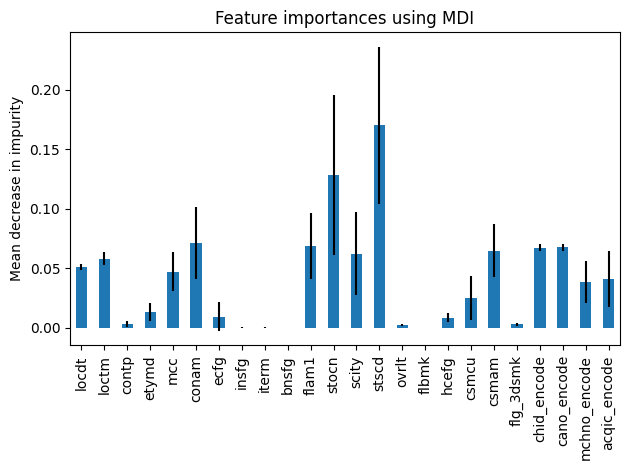

In [52]:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
import pandas as pd
import matplotlib.pyplot as plt

forest_importances = pd.Series(importances, index=X.columns)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [31]:
test_file_path = 'testing_data.csv'
test_data = pd.read_csv(test_file_path)
test_data.head()

,txkey,locdt,loctm,chid,cano,contp,etymd,mchno,acqic,mcc,...,stocn,scity,stscd,ovrlt,flbmk,hcefg,csmcu,csmam,flg_3dsmk,label
0,45cc0350e06e076280694ad6a58c347a0345c51b1335ea...,41,115821,50cd4dc9e212a83d64c4c1abee9fcb7c7c08fc748bc12c...,464128794c503d58ee4f8cc56ca37f856bc0c5323990f2...,5,4.0,33200ccb65668eea5d305f4ae071a691da1f603f93ce0a...,379166ff4a62dac343b4b734188aa618716cc496e48b65...,282.0,...,0.0,15742.0,-1.0,0,0,6.0,70.0,28,0,0
1,b197b0ff8cf64ec6ea77237daa5bd854e9130823244a94...,34,143057,757ce523edf617382a768169755ad02c7c51e08412de01...,469e4041c9e82ae7ef731fcc5c28a72725bc0b29d9f4dc...,5,5.0,12345d5af40afd8753c7060811dc26793256c12b9059ab...,379166ff4a62dac343b4b734188aa618716cc496e48b65...,272.0,...,0.0,15759.0,-1.0,0,0,6.0,70.0,379,0,0
2,bfc98a4eb78ec928450fff2122258bc5876ed68dde6235...,5,131757,2f67f524a44c3679c305febfdc48c20764c6cd96f73c40...,970a163ffedeb3527e437a35bbddf6bd741a663b427aef...,5,8.0,aafce27e52a4ec6c3915dab75af0dc63f8bde74055dcab...,bcf6370b700fb26d1fab05dad5de442b2bf37689cb55fd...,325.0,...,0.0,15759.0,-1.0,0,0,6.0,70.0,48,0,0
3,6716936f8416032a5c51599bdc91ee3eeff73ac35018bc...,28,211030,653c2a5dc397a7d836830f95054996de682fb502210147...,53897bd0fd7e2d23efa001dbb0107974d85a85220b49f5...,5,1.0,19f902609c68157ca7a0996e3e07721e68832157101c9c...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,-1.0,...,0.0,15759.0,-1.0,0,0,8.0,-1.0,0,0,0
4,0ba62cac22d6ee718dae7dc2f886c95b440d63ed28323c...,34,175754,2619e4bfab0dea4276fa4bccdb039f5bf19f5ce931f24e...,0ca8acdd548cb284179db4da78e059870e2b2f605cb6e4...,5,8.0,dd280b4f35a02701142ba7de47abb9736deca3eed86474...,46f63555d29f177290dfe20e989146fb033e453f1d5ff3...,320.0,...,0.0,13451.0,-1.0,0,0,0.0,70.0,1266,1,0


In [32]:
test_data['chid_encode'] = label_encoder.fit_transform(test_data['chid'])
test_data['cano_encode'] = label_encoder.fit_transform(test_data['cano'])
test_data['mchno_encode'] = label_encoder.fit_transform(test_data['mchno'])
test_data['acqic_encode'] = label_encoder.fit_transform(test_data['acqic'])

In [37]:
X_test = test_data.drop(['label', 'txkey', 'chid', 'cano', 'mchno', 'acqic'], axis=1)  # 解釋變數
y_test = test_data['label']  # 目標變數
y_test.value_counts()

0    865675
1      3203
Name: label, dtype: int64

In [38]:
from sklearn.metrics import f1_score
# 進行預測
y_pred = clf.predict(X_test)

# 評估模型性能
accuracy = accuracy_score(y_test, y_pred)
print(f"模型準確率：{accuracy:.2f}")

# 顯示更多的評估結果
print(classification_report(y_test, y_pred))
# F1 score
print(f1_score(y_test, y_pred, average='macro'))

模型準確率：1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    865675
           1       0.66      0.70      0.68      3203

    accuracy                           1.00    868878
   macro avg       0.83      0.85      0.84    868878
weighted avg       1.00      1.00      1.00    868878

0.8391893654129376


In [39]:
cnt_0 = 0; cnt_1 = 0
for i in y_pred:
  if i == 0:
    cnt_0 += 1
  else :
    cnt_1 += 1
print(cnt_0, cnt_1)

865483 3395


# 預測要提交的檔案

In [59]:
csv_path = 'dataset_1st/public_processed.csv'
target_data = pd.read_csv(csv_path)

In [60]:
target_data.head()

,txkey,locdt,loctm,chid,cano,contp,etymd,mchno,acqic,mcc,...,flam1,stocn,scity,stscd,ovrlt,flbmk,hcefg,csmcu,csmam,flg_3dsmk
0,a2c1209018e4e52e04f6fabb48f05f1b8bc09dc838ff6c...,56,105157,d6d145d0d058e3f63b9ec421cf9e1543b0c3e059d18c2c...,9c454e0cf3680075b0382394ca59b00ee9435fd829da29...,4,1.0,8be206f97d10b57a46ea0ef5527155a0f9b48d16255b70...,2a608b081c09492bd2bc96d7def5371c4bc9cabf324a98...,272.0,...,1349,0.0,15759.0,NaN,0,0,6.0,70.0,1349,0
1,16c4880500059e01553789be11bbb50753b7acaae7b95b...,56,185520,b599fb83473599fa2df4a04136a668c28df7914293f1da...,9f097cba6a70333c906904ebaad438356cf75b6abf5dd4...,5,8.0,dd280b4f35a02701142ba7de47abb9736deca3eed86474...,46f63555d29f177290dfe20e989146fb033e453f1d5ff3...,320.0,...,306,0.0,13451.0,NaN,0,0,6.0,70.0,306,0
2,623c56be3bee87724e3d119c271d9ed098eeda84233183...,59,102312,8de197129150d454df1639e9743c1aa11b1c1122a2010c...,439691cb167b272661c2eb9073124f5d422f446b0f92fb...,5,1.0,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,494.0,...,20,0.0,15759.0,NaN,0,0,NaN,NaN,0,0
3,250da12187059cf6e3a3066656a2919d08ceb8207efd55...,58,230138,f9cbad08a76f1dd9736a4fc51255eb55637ec0a417a406...,992679b728784192c17e90939918cbfae32ad1222fad26...,5,5.0,bd2b3523b4ecd652445b75ea7583c92f6f02af3971251b...,70dac5b1dfde828f556a93321a649df72891db35430588...,272.0,...,8339,42.0,12381.0,NaN,0,0,6.0,70.0,8339,0
4,4b268e0da036f44cbbb056ddfac6a28ea336d9cf299843...,59,101937,27d235e691a425098f291105f78f9877e05bb75e1f132b...,763fd2a91420f9b632c378ca82ff9e318851fa1964cbba...,5,5.0,156987f72b8993b8c5a898fa76f3b8e6454e10e18aa238...,89b1654aaef0b65b1868004cfdce2dcbb67f15b7fba535...,217.0,...,163,126.0,14786.0,NaN,0,0,6.0,68.0,5,0


In [61]:
target_data['chid_encode'] = label_encoder.fit_transform(target_data['chid'])
target_data['cano_encode'] = label_encoder.fit_transform(target_data['cano'])
target_data['mchno_encode'] = label_encoder.fit_transform(target_data['mchno'])
target_data['acqic_encode'] = label_encoder.fit_transform(target_data['acqic'])

In [58]:
# target_data_drop = target_data.drop(['txkey', 'chid', 'cano', 'mchno', 'acqic'], axis=1)  # 解釋變數

In [ ]:
print(target_data.isnull().sum())
target_data['etymd'].fillna(value=-1.0, inplace=True)
target_data['mcc'].fillna(value=-1, inplace=True)
target_data['stocn'].fillna(value=-1, inplace=True)
target_data['stscd'].fillna(value=-1, inplace=True)
target_data['hcefg'].fillna(value=-1, inplace=True)
target_data['csmcu'].fillna(value=-1, inplace=True)
target_data['scity'].fillna(value=-1, inplace=True)
print(target_data.isnull().sum())

In [64]:
target_data.columns

Index(['txkey', 'locdt', 'loctm', 'chid', 'cano', 'contp', 'etymd', 'mchno',
       'acqic', 'mcc', 'conam', 'ecfg', 'insfg', 'iterm', 'bnsfg', 'flam1',
       'stocn', 'scity', 'stscd', 'ovrlt', 'flbmk', 'hcefg', 'csmcu', 'csmam',
       'flg_3dsmk', 'chid_encode', 'cano_encode', 'mchno_encode',
       'acqic_encode'],
      dtype='object')

In [65]:
# target_df_encoded = target_df_encoded.drop(['csmcu', 'etymd'], axis=1)
target_df_encoded = target_data.drop(['txkey', 'chid', 'cano', 'mchno', 'acqic'], axis=1)  # 解釋變數

In [66]:
target_df_encoded.head()

,locdt,loctm,contp,etymd,mcc,conam,ecfg,insfg,iterm,bnsfg,...,ovrlt,flbmk,hcefg,csmcu,csmam,flg_3dsmk,chid_encode,cano_encode,mchno_encode,acqic_encode
0,56,105157,4,1.0,272.0,1353.00,0,1,3.0,0,...,0,0,6.0,70.0,1349,0,183578,146248,28463,460
1,56,185520,5,8.0,320.0,305.00,1,0,0.0,0,...,0,0,6.0,70.0,306,0,155127,148756,45191,759
2,59,102312,5,1.0,494.0,20.00,0,0,0.0,0,...,0,0,-1.0,-1.0,0,0,121197,63298,31582,1618
3,58,230138,5,5.0,272.0,8371.00,1,0,0.0,0,...,0,0,6.0,70.0,8339,0,213589,143290,38566,1173
4,59,101937,5,5.0,217.0,163.69,1,0,0.0,0,...,0,0,6.0,68.0,5,0,33941,110623,4440,1438


In [67]:
# y_target_pred = clf.predict(target_data_drop)
y_target_pred = clf.predict(target_df_encoded)
print(y_target_pred)
print(len(y_target_pred))
print(type(y_target_pred))

[0 0 0 ... 0 0 0]
600182
<class 'numpy.ndarray'>


In [68]:
# target_data['txkey']
target_series = pd.Series(y_target_pred, name = 'pred')
print(target_series)

0         0
1         0
2         0
3         0
4         0
         ..
600177    0
600178    0
600179    0
600180    0
600181    0
Name: pred, Length: 600182, dtype: int64


In [69]:
df = pd.merge(target_data['txkey'], target_series, right_index=True, left_index=True)
print(df)
print(df['pred'].value_counts())

                                                    txkey  pred
0       a2c1209018e4e52e04f6fabb48f05f1b8bc09dc838ff6c...     0
1       16c4880500059e01553789be11bbb50753b7acaae7b95b...     0
2       623c56be3bee87724e3d119c271d9ed098eeda84233183...     0
3       250da12187059cf6e3a3066656a2919d08ceb8207efd55...     0
4       4b268e0da036f44cbbb056ddfac6a28ea336d9cf299843...     0
...                                                   ...   ...
600177  741a391b2c2114491d1d18acb1a892341b9280e1e3529f...     0
600178  76f613595631fb35938bf10f5b7abe3f60a3d34ccf5f44...     0
600179  c32e846a4469e4869e2df8f8e160fba4e829b6beebb44d...     0
600180  d641cd25a830de759cd55b4a643d71eadb770bc917aed3...     0
600181  301d0262bdd594a886446ddca09b4a21bef51dddf9618a...     0

[600182 rows x 2 columns]
0    597642
1      2540
Name: pred, dtype: int64


In [71]:
df.to_csv('submission_1030_2.csv', index=False)